<a href="https://colab.research.google.com/github/Marc86316/DataCamp/blob/main/Exploratory_Data_Analysis_in_Python/Turning_Exploratory_Analysis_into_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Turning Exploratory Analysis into Action**

Exploratory data analysis is a crucial step in the data science workflow, but it isn't the end! Now it's time to learn techniques and considerations you can use to successfully move forward with your projects after you've finished exploring!

## Import data and libaries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ds_salaries_clean_url = 'https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/Exploratory_Data_Analysis_in_Python/ds_salaries_clean.csv'
ds_salaries_clean = pd.read_csv(ds_salaries_clean_url)
ds_salaries_clean.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [6]:
# Check and remove the "Unnamed: 0" column if it exists
if "Unnamed: 0" in ds_salaries_clean.columns:
    ds_salaries_clean = ds_salaries_clean.drop(columns=["Unnamed: 0"])

# Reset the index to be 0 to N (optional, if needed)
ds_salaries_clean.reset_index(drop=True, inplace=True)

# Now df has a clean index and no extra "Unnamed" column

In [7]:
import pandas as pd
import numpy as np

salaries_url = 'https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/Exploratory_Data_Analysis_in_Python/salaries.csv'
salaries = pd.read_csv(salaries_url)
salaries.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,0,2020,Machine Learning Scientist,SE,FT,20688070.0,JP,JP,S,0.0,248256.840,Machine Learning
1,1,2020,Big Data Engineer,SE,FT,8674985.0,GB,GB,M,50.0,104099.820,Data Engineering
2,2,2020,Product Data Analyst,MI,FT,1591390.0,HN,HN,S,0.0,19096.680,Data Analytics
3,3,2020,Machine Learning Engineer,SE,FT,11935425.0,US,US,L,50.0,143225.100,Machine Learning
4,4,2020,Data Analyst,EN,FT,5729004.0,US,US,L,100.0,68748.048,Data Analytics


In [8]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            407 non-null    int64  
 1   Working_Year          407 non-null    int64  
 2   Designation           407 non-null    object 
 3   Experience            407 non-null    object 
 4   Employment_Status     407 non-null    object 
 5   Salary_In_Rupees      407 non-null    float64
 6   Employee_Location     407 non-null    object 
 7   Company_Location      407 non-null    object 
 8   Company_Size          407 non-null    object 
 9   Remote_Working_Ratio  407 non-null    float64
 10  Salary_USD            407 non-null    float64
 11  Job_Category          407 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 38.3+ KB


## Exercise - **Checking for class imbalance**

The [2022 Kaggle Survey](https://www.kaggle.com/kaggle-survey-2022) captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.

Having looked at the job titles and categorized to align with our `salaries` DataFrame, you can see the following proportion of job categories in the Kaggle survey:

| Job Category       | Relative Frequency |
|--------------------|-------------------|
| Data Science      | 0.281236           |
| Data Analytics    | 0.224231           |
| Other            | 0.214609           |
| Managerial       | 0.121300           |
| Machine Learning | 0.083248           |
| Data Engineering | 0.075375           |

Thinking of the Kaggle survey results as the population, your task is to find out whether the `salaries` DataFrame is representative by comparing the relative frequency of job categories.


**Instructions**

Print the relative frequency of the `"Job_Category"` column from `salaries` DataFrame.


In [9]:
# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts(normalize=True).round(3))

Job_Category
Data Science        0.278
Data Engineering    0.273
Data Analytics      0.226
Machine Learning    0.120
Other               0.069
Managerial          0.034
Name: proportion, dtype: float64


**Result**: Fantastic relative frequency calculation! It looks like Data Science is the most popular class and has a similar representation. Still, the other categories have quite different relative frequencies, which might not be surprising given the target audience is data scientists! Given the difference in relative frequencies, can you trust the `salaries` DataFrame to accurately represent Managerial roles?

## Exercise - **Cross-tabulation**

Cross-tabulation can help identify how observations occur in combination.

Using the `salaries` dataset, which has been imported as a `pandas` DataFrame, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between `"Company_Size"` and other variables.


**Instructions**

* Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience".

In [10]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    EN  EX  MI   SE
Company_Size                 
L             24   7  49   44
M             25   9  58  136
S             18   1  21   15


* Cross-tabulate `"Job_Category"` and classes of `"Company_Size"` as column names.

In [11]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L   M   S
Job_Category                
Data Analytics    23  61   8
Data Engineering  28  72  11
Data Science      38  59  16
Machine Learning  17  19  13
Managerial         5   8   1
Other             13   9   6


* Update `pd.crosstab()` to return the mean `"Salary_USD"` values.

In [12]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                  L              M             S
Job_Category                                                
Data Analytics    112851.749217   95912.685246  53741.877000
Data Engineering  118939.035000  121287.060500  86927.136000
Data Science       96489.520105  116044.455864  62241.749250
Machine Learning  140779.491529  100794.236842  78812.586462
Managerial        190551.448800  150713.628000  31484.700000
Other              92873.911385   89750.578667  69871.248000


**Result**: Awesome cross-tabulation! This is a handy function to examine the combination of frequencies, as well as find aggregated statistics. Looks like the largest mean salary is for Managerial data roles in large companies!

# **Generating new features**


# Exercise - **Extracting features for correlation**

In this exercise, you'll work with a version of the `salaries` dataset containing a new column called `"date_of_response"`.

The dataset has been read in as a pandas DataFrame, with `"date_of_response"` as a `datetime` data type.

Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.

In [13]:
import pandas as pd
import numpy as np

salaries_date_of_response_url = 'https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/Exploratory_Data_Analysis_in_Python/salaries_date_of_response.csv'
salaries_date_of_response = pd.read_csv(salaries_date_of_response_url)
salaries_date_of_response.head()

,Unnamed: 0,Designation,date_of_response,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,0,Machine Learning Scientist,2020-01-07,SE,FT,20688070.0,JP,JP,S,0.0,248256.840,Machine Learning
1,1,Big Data Engineer,2020-09-19,SE,FT,8674985.0,GB,GB,M,50.0,104099.820,Data Engineering
2,2,Product Data Analyst,2020-11-21,MI,FT,1591390.0,HN,HN,S,0.0,19096.680,Data Analytics
3,3,Machine Learning Engineer,2020-11-29,SE,FT,11935425.0,US,US,L,50.0,143225.100,Machine Learning
4,4,Data Analyst,2020-09-07,EN,FT,5729004.0,US,US,L,100.0,68748.048,Data Analytics


In [14]:
# Check and remove the "Unnamed: 0" column if it exists
if "Unnamed: 0" in salaries_date_of_response.columns:
    salaries_date_of_response = salaries_date_of_response.drop(columns=["Unnamed: 0"])

# Reset the index to be 0 to N (optional, if needed)
salaries_date_of_response.reset_index(drop=True, inplace=True)

# Now df has a clean index and no extra "Unnamed" column

**Instructions**

* Extract the month from `"date_of_response"`, storing it as a column called `"month"`.
* Create the `"weekday"` column, containing the weekday that the participants completed the survey.
* Plot a heat map, including the Pearson correlation coefficient scores.

In [15]:
# Convert 'date_of_response' to datetime
salaries_date_of_response["date_of_response"] = pd.to_datetime(salaries_date_of_response["date_of_response"])

# key exercise below
# Extract the month from date_of_response
salaries_date_of_response["month"] = salaries_date_of_response["date_of_response"].dt.month

# Extract the weekday from date_of_response
salaries_date_of_response["weekday"] = salaries_date_of_response["date_of_response"].dt.weekday

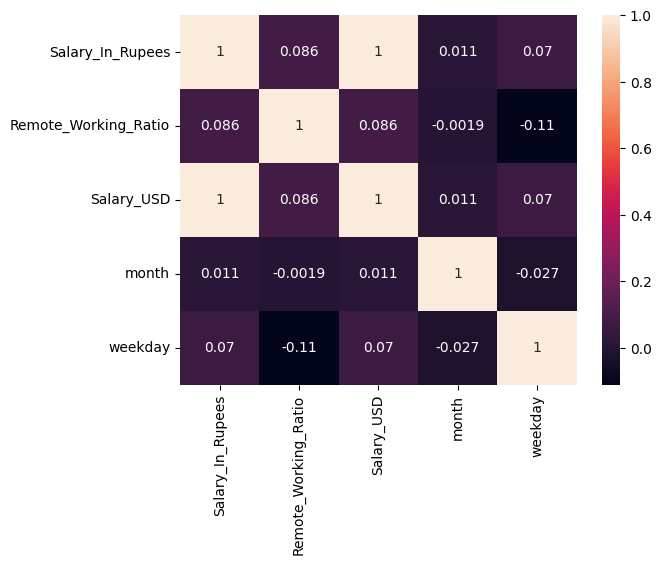

In [16]:
# Assuming salaries_date_of_response is your DataFrame

# Select only numerical features for correlation analysis
numerical_features = salaries_date_of_response.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# key exercise below
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**Result** : Fantastic feature creation! Looks like there aren't any meaningful relationships between our numeric variables, so let's see if converting numeric data into classes offers additional insights.

## Exercise - **Calculating salary percentiles**

In the video, you saw that the conversion of numeric data into categories sometimes makes it easier to identify patterns.

Your task is to convert the `"Salary_USD"` column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.


**Instructions**

* Find the 25th percentile of `"Salary_USD"`.
* Store the median of `"Salary_USD"` as `salaries_median`.
* Get the 75th percentile of salaries.



In [17]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

60880.691999999995 97488.552 143225.1


**Result** : Looks like the interquartile range is between 60,881 and 143,225 dollars! Now let's use these variables to add a categorical salary column into the DataFrame!

## Exercise - **Categorizing salaries**

Now it's time to make a new category! You'll use the variables `twenty_fifth`, `salaries_median`, and `seventy_fifth`, that you created in the previous exercise, to split salaries into different labels.

The result will be a new column called `"salary_level"`, which you'll incorporate into a visualization to analyze survey respondents' salary and at companies of different sizes.

**Instructions 4/4**

* Create `salary_labels`, a list containing `"entry"`, `"mid"`, `"senior"`, and `"exec"`.
* Finish `salary_ranges`, adding the 25th percentile, median, 75th percentile, and largest value from `"Salary_USD"`.
* Split `"Salary_USD"` based on the labels and ranges you've created.
* Use `sns.countplot()` to visualize the count of `"Company_Size"`, factoring salary level labels.




In [18]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

In [19]:
# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

In [20]:
# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

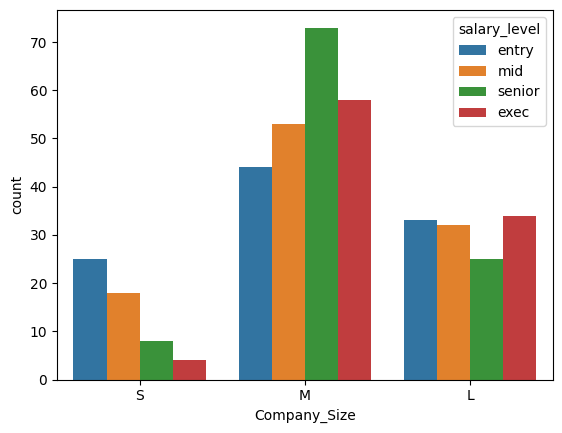

In [21]:
# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

**Result** :Nice work! By using `pd.cut()` to split out numeric data into categories, you can see that a large proportion of workers at small companies get paid "entry" level salaries, while more staff at medium-sized companies are rewarded with "senior" level salary. Now let's look at generating hypotheses as you reach the end of the EDA phase!

# **Generating hypotheses**


## Exercise - **Comparing salaries**

Exploratory data analysis is a crucial step in generating hypotheses!

You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain?

You'll need to subset the data by `"Employee_Location"` and produce a plot displaying the average salary between the two groups.



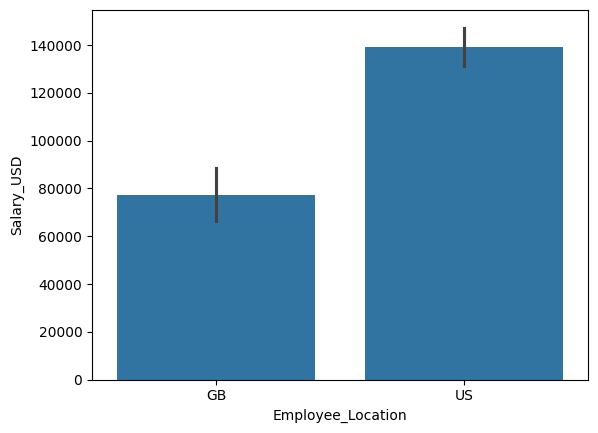

In [24]:
# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

**Result** : Nicely done! By subsetting the data you were able to directly compare salaries between the USA and Great Britain. The visualization suggests you've generated a hypothesis that is worth formally investigating to determine whether a real difference exists or not!

## Exercise - **Choosing a hypothesis**

You've seen how visualizations can be used to generate hypotheses, making them a crucial part of exploratory data analysis!

In this exercise, you'll generate a bar plot to inspect how salaries differ based on company size and employment status. For reference, there are four values:

| Value | Meaning     |
|-------|-------------|
| CT    | Contractor  |
| FL    | Freelance   |
| PT    | Part-time   |
| FT    | Full-time   |


**Instructions** 2/2

* Produce a barplot comparing `"Salary_USD"` by `"Company_Size"`, factoring `"Employment_Status"`.

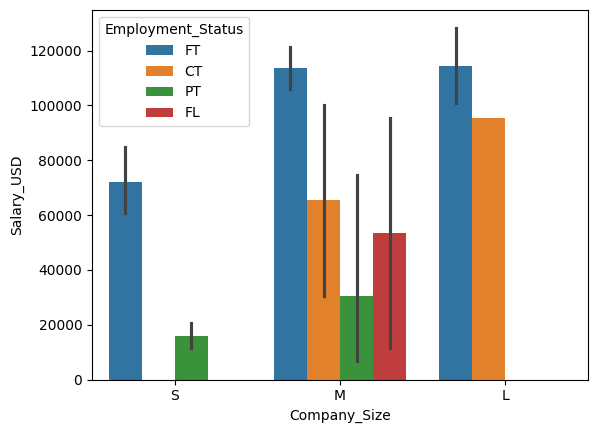

In [25]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()

**Question**
* What is a reasonable hypothesis to generate based on this plot?

**Possible answers**


> On average, small companies pay part-time employees less than large companies.

> Freelancers earn more at medium-sized companies compared to small or large companies.

> On average, large companies pay contractors more than medium-sized companies. ✅

> No hypotheses can be generated from this plot.

**Result** : Excellent! Contractors appear to be paid more by large companies on average based on the data, so this is a reasonable hypothesis! Let's recap what you've learned in the course!